# LendingClub: (2) Variable Selections
- Sonny Song (xs2512@columbia.edu); Zi Wang (zw2933@columbia.edu); Hyunwoo Woo (hw2980@columbia.edu)
- 2025-02-08

- Borrowers' issue dates: Jan. 2007 - Dec. 2018

In [196]:
# Packages (modules)
import pandas as pd; import numpy as np; import re; import pickle
import matplotlib.pyplot as plt; import seaborn as sns
from scipy.stats import ttest_ind
pd.options.display.float_format = '{:.5f}'.format # pd.set_option('display.max_row', 30); # pd.set_option('display.max_columns', 30)

### <font color=red>Write your file path</font>
- <font color=red>where LendingClub data is saved: "df_ac_240705.pkl"  and "df_rj_240705.pkl"</font>

In [198]:
import os
path = os.getcwd(); os.chdir("D:/Research/P2P_Lending/data_origin/data_clean") # Write your file path
# import py_stata_model # Personal module for Python-Stata transformation
print(path)

D:\Research\P2P_Lending\data_origin\data_clean


# <font color=green>0. Load</font>

In [200]:
df_ac = pd.read_pickle("df_ac_240705.pkl")
df_ac

# df_rj = pd.read_pickle("df_rj_240705.pkl")
# df_rj

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,vrf_s,individual,emp_title_soc,sim_score_BERT,unrate_m,funds_rate_m,treasury_yield_3y,treasury_yield_5y,treasury_yield_10y,treasury_yield
0,68407277,3600.00000,3600.00000,3600.00000,36 months,13.99000,123.03000,C,C4,leadman,...,0,1,Chief Executives,42.05400,5.00000,0.24000,1.28045,1.69864,2.24273,1.28045
1,68355089,24700.00000,24700.00000,24700.00000,36 months,11.99000,820.28000,C,C1,Engineer,...,0,0,"Engineers, All Other",85.68000,5.00000,0.24000,1.28045,1.69864,2.24273,1.28045
2,68341763,20000.00000,20000.00000,20000.00000,60 months,10.78000,432.66000,B,B4,truck driver,...,0,1,Light Truck Drivers,82.05800,5.00000,0.24000,1.28045,1.69864,2.24273,1.69864
3,66310712,35000.00000,35000.00000,35000.00000,60 months,14.85000,829.90000,C,C5,Information Systems Officer,...,1,1,Computer and Information Systems Managers,78.04100,5.00000,0.24000,1.28045,1.69864,2.24273,1.69864
4,68476807,10400.00000,10400.00000,10400.00000,60 months,22.45000,289.91000,F,F1,Contract Specialist,...,1,1,Labor Relations Specialists,60.76400,5.00000,0.24000,1.28045,1.69864,2.24273,1.69864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,89885898,24000.00000,24000.00000,24000.00000,60 months,12.79000,543.50000,C,C1,Unit Operator,...,1,1,"Service Unit Operators, Oil and Gas",51.41600,4.90000,0.40000,0.98900,1.27200,1.76450,1.27200
2260664,88977788,24000.00000,24000.00000,24000.00000,60 months,10.49000,515.74000,B,B3,Database Administrator,...,0,1,Database Administrators,94.95600,4.90000,0.40000,0.98900,1.27200,1.76450,1.27200
2260665,88985880,40000.00000,40000.00000,40000.00000,60 months,10.49000,859.56000,B,B3,Vice President,...,0,1,"Office Clerks, General",42.16400,4.90000,0.40000,0.98900,1.27200,1.76450,1.27200
2260666,88224441,24000.00000,24000.00000,24000.00000,60 months,14.49000,564.56000,C,C4,Program Manager,...,0,1,Computer and Information Systems Managers,59.53200,4.90000,0.40000,0.98900,1.27200,1.76450,1.27200


# <font color=blue>1. Selected variables (preliminary) </font>

### <font color=green>Borrower Characteristics</font>
- 'emp_title', 'emp_length', 'emp_length_num', 'emp_title_soc', 'sim_score_BERT'
- 'home_ownership', 'annual_inc', 'annual_inc_log', 'annual_inc1_natlog'
- 'addr_state'

### <font color=green>Loan Contract Terms</font>
- 'issue_d', 'year_issue', 'yearq_issue', 'yearm_issue'
- 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'loan_amnt_log', 'loan_amnt_natlog'
- 'term', 'term_60mth'
- 'int_rate'
- 'grade', 'sub_grade', 'grade_num'
- 'desc', 'title'
- 'purpose'
- 'initial_list_status'

### <font color=green>Credit Risk & History</font>
- 'dti'
- 'credit_hist_y', 'revol_util', 'revol_bal1_log', 'revol_bal1_natlog', 'delinq_2yrs', 'inq_last_6mths'
- 'revol_bal', 'open_acc'
- 'fico_app'

### <font color=green>Macroeconomic & Market Conditions</font>
- 'treasury_yield', 'unrate_m', 'funds_rate_m'

### <font color=green>Loan Performance & Outcomes</font>
- 'loan_status', 'default'

### ETC.
- 'id', 'individual', 'policy_code'

In [203]:
check_var = ['id', 'individual', 'policy_code', 'application_type']
# Var 1: Borrower Characteristics
var1 = ['emp_title', 'emp_length', 'emp_length_num', 'emp_title_soc', 'sim_score_BERT',
        'home_ownership', 'annual_inc', 'annual_inc_log', 'annual_inc1_natlog',
        'addr_state']

# Var 2: Loan Contract Terms
var2 = ['issue_d', 'year_issue', 'yearq_issue', 'yearm_issue', 
        'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'loan_amnt_log', 'loan_amnt_natlog',
        'term', 'term_60mth',
        'int_rate',
        'grade', 'sub_grade', 'grade_num',
        'desc', 'title',
        'purpose', 
        'initial_list_status'] # initial list status: [w: Whole Loan Investor (only 1 investor); f: Fractional Loan (n investors)]

# Var 3: Credit Risk & History
var3 = ['dti', 
        'fico_app',
        'credit_hist_y', 
        'revol_util', 'revol_bal', 'revol_bal1_log', 'revol_bal1_natlog', 'open_acc',
        'delinq_2yrs', 'inq_last_6mths',]

# Var 4: Macroeconomic & Market Conditions
var4 = ['treasury_yield', 'unrate_m', 'funds_rate_m']

# Var 5: Loan Performance/Outcomes (repayment result)
var5 = ['loan_status', 'default'] # default: [0 = fully paid; 1 = default; NaN = etc.(ongoing or delayed)]

# <font color=blue>2. Pre-processing</font>

### <font color=red>2.1 borrower type</font>
- 'application_type' != "Joint App" (ONLY single)
- 'policy_code' != 2 (NOT standard loan policy BUT custom or special policy)

In [206]:
print(df_ac.application_type.value_counts(dropna = False))
print(df_ac.policy_code.value_counts(dropna = False))

df_ac = df_ac[(df_ac['policy_code'] != 2) & (df_ac['application_type'] != "Joint App")]
df_ac.shape[0]

Individual    2139958
Joint App      120710
Name: application_type, dtype: int64
1.00000    2257919
2.00000       2749
Name: policy_code, dtype: int64


2137209

### <font color=red>2.2 Missing value check (NaN)</font>
- Be careful NaN: 'funded_amnt_inv', 'loan_status', 'default', 'dti', 'inq_last_6mths'
- <font color=green>We do not remove observations that have missing values in these columns (e.g., Descriptive statistics)</font>
- <font color=green>BUT in modeling: We automatically delete the observations (e.g., OLS, Logit model, etc.)</font>

In [208]:
# How many NaN (missing values)?
which_var = check_var + var1 + var2 + var3 + var4 + var5
print(f"# of Total Sample = {len(df_ac)}")

missing_summary = df_ac[which_var].isna().sum().apply(lambda x: f"{x} ({x / len(df_ac) * 100:.2f}%)")
print(missing_summary)

# of Total Sample = 2137209
id                            0 (0.00%)
individual                    0 (0.00%)
policy_code                   0 (0.00%)
application_type              0 (0.00%)
emp_title                148539 (6.95%)
emp_length               130323 (6.10%)
emp_length_num           130323 (6.10%)
emp_title_soc            148539 (6.95%)
sim_score_BERT           148539 (6.95%)
home_ownership                0 (0.00%)
annual_inc                    0 (0.00%)
annual_inc_log                0 (0.00%)
annual_inc1_natlog            0 (0.00%)
addr_state                    0 (0.00%)
issue_d                       0 (0.00%)
year_issue                    0 (0.00%)
yearq_issue                   0 (0.00%)
yearm_issue                   0 (0.00%)
loan_amnt                     0 (0.00%)
funded_amnt                   0 (0.00%)
funded_amnt_inv             129 (0.01%)
loan_amnt_log                 0 (0.00%)
loan_amnt_natlog              0 (0.00%)
term                          0 (0.00%)
term_60mth  

In [209]:
df_ac[df_ac['desc'].notna()].desc

1480       We knew that using our credit cards to finance...
33065      I had a bad year two years ago, with some late...
37860      Lenders,  I have the ability to pay off my cur...
50494       I paid off my first Prosper loan, but had an ...
61258                                                       
                                 ...                        
1994188    I currently have a loan out with CashCall. The...
2018668                                     Consolidate debt
2028885    This loan will be used solely to consolidate c...
2032724    I have recently purchased and built a new home...
2242912    To whom it may concern,     Hello, my name is ...
Name: desc, Length: 123642, dtype: object

In [210]:
print( "*borrowers who do not have credit account (open_acc) and revolving utilization (%)\n", 
      df_ac[df_ac['open_acc'] ==0].revol_util.value_counts(dropna = False),"\n" )

print("*Borrower case whose 'revol_util' is NaN but 'revol_bal' is non-zero")
(df_ac[df_ac['revol_util'].isna()])['revol_bal']

*borrowers who do not have credit account (open_acc) and revolving utilization (%)
 NaN    47
Name: revol_util, dtype: int64 

*Borrower case whose 'revol_util' is NaN but 'revol_bal' is non-zero


1537           0.00000
3577         488.00000
5674        6424.00000
6781           0.00000
8116           0.00000
              ...     
2255934   547095.00000
2256278    47622.00000
2257083        0.00000
2258015        0.00000
2258064        0.00000
Name: revol_bal, Length: 1512, dtype: float64

In [211]:
df_ac[['funded_amnt_inv', 'loan_status', 'default', 'dti', 'inq_last_6mths']].isna().sum()

funded_amnt_inv       129
loan_status           129
default            817794
dti                     1
inq_last_6mths          1
dtype: int64

### <font color=red>2.3 Outlier check</font>
- Be careful outlier: 'funded_amnt_inv', 'annual_inc', 'credit_hist_y', 'revol_util', 'revol_bal', 'delinq_2yrs'
- <font color=green>Remove observations (when modeling of dep.var. = 'default'): 'funded_amnt_inv' < 100 ($)</font>
    - DO NOT Remove observations (when modeling of dep.var. = 'int_rate')
- <font color=green>Winsorizing: 'annual_inc', 'credit_hist_y', 'revol_util', 'revol_bal', 'delinq_2yrs'</font>

In [213]:
var_outlier_check = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'dti', 'credit_hist_y', 
                     'revol_util', 'revol_bal', 'delinq_2yrs', 'inq_last_6mths']
desc_out = df_ac[var_outlier_check].describe()

# NaN's
desc_out.loc['missing'] = df_ac[var_outlier_check].isna().sum()
# 0.1%, 1%, 99%, 99.9%
quantiles = df_ac[var_outlier_check].quantile([0.001, 0.01, 0.99, 0.999])
quantiles.index = ['0.1%', '1%', '99%', '99.9%']

desc_out = pd.concat([desc_out, quantiles])
desc_out

,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,dti,credit_hist_y,revol_util,revol_bal,delinq_2yrs,inq_last_6mths
count,2137209.00000,2137209.00000,2137080.00000,2137209.00000,2137208.00000,2137209.00000,2135697.00000,2137209.00000,2137209.00000,2137208.00000
mean,14795.66956,14790.36390,14775.56298,79010.82146,18.09822,16.37207,50.51286,16645.66251,0.31006,0.58262
std,9036.50547,9034.33901,9035.30841,115123.58099,8.42553,7.66410,24.61903,22884.83153,0.87247,0.87912
min,500.00000,500.00000,0.00012,1900.00000,0.00000,3.00000,0.00000,0.00000,0.00000,0.00000
25%,8000.00000,8000.00000,8000.00000,47500.00000,11.78000,11.00000,31.80000,5989.00000,0.00000,0.00000
50%,12300.00000,12275.00000,12250.00000,65400.00000,17.60000,15.00000,50.40000,11331.00000,0.00000,0.00000
75%,20000.00000,20000.00000,20000.00000,95000.00000,24.05000,20.00000,69.40000,20208.00000,0.00000,1.00000
max,40000.00000,40000.00000,40000.00000,110000000.00000,49.96000,83.00000,892.30000,2904836.00000,58.00000,8.00000
missing,0.00000,0.00000,129.00000,0.00000,1.00000,0.00000,1512.00000,0.00000,0.00000,1.00000
0.1%,1000.00000,1000.00000,1000.00000,10800.00000,0.22000,3.00000,0.00000,0.00000,0.00000,0.00000


### <font color=red>2.4 Categorical variable check</font>
- 'home_ownership', 'purpose'

In [215]:
df_ac.default.value_counts()

0.00000    1057193
1.00000     262222
Name: default, dtype: int64

In [216]:
df_ac.home_ownership.value_counts()

MORTGAGE    1030326
RENT         864262
OWN          241436
OTHERS         1185
Name: home_ownership, dtype: int64

In [217]:
df_ac.purpose.value_counts()

debt_consolidation    1205303
credit_card            493773
home_improvement       140345
other                  131738
major_purchase          47803
medical                 25197
small_business          23403
car                     22834
vacation                14846
moving                  14489
house                   13481
wedding                  2298
renewable_energy         1372
educational               327
Name: purpose, dtype: int64

In [218]:
print(df_ac['purpose'].unique())

['debt_consolidation' 'small_business' 'major_purchase' 'credit_card'
 'other' 'home_improvement' 'house' 'vacation' 'car' 'medical' 'moving'
 'renewable_energy' 'wedding' 'educational']


### <font color=red>2.5 Correlations</font>


In [220]:
# Var 1: Borrower Characteristics
var1_cor = ['emp_length_num', 
            'annual_inc', 'annual_inc_log', 'annual_inc1_natlog']

# Var 2: Loan Contract Terms
var2_cor = ['loan_amnt', 'loan_amnt_log', 'loan_amnt_natlog', 
            'term_60mth',
            'int_rate', 'grade_num']

# Var 3: Credit Risk & History
var3_cor = ['dti', 
            'fico_app',
            'credit_hist_y', 
            'revol_util', 'revol_bal', 'revol_bal1_log', 'revol_bal1_natlog', 'open_acc',
            'delinq_2yrs', 'inq_last_6mths',]

# Var 4: Macroeconomic & Market Conditions
var4_cor = ['treasury_yield', 'unrate_m', 'funds_rate_m']

# Var 5: Loan Performance/Outcomes (repayment result)
var5_cor = ['default'] # default: [0 = fully paid; 1 = default; NaN = etc.(ongoing or delayed)]

In [221]:
sel_vars_cor = var1_cor + var2_cor + var3_cor + var4_cor + var5_cor
corr_mat = df_ac[sel_vars_cor].corr()
corr_mat

,emp_length_num,annual_inc,annual_inc_log,annual_inc1_natlog,loan_amnt,loan_amnt_log,loan_amnt_natlog,term_60mth,int_rate,grade_num,...,revol_bal,revol_bal1_log,revol_bal1_natlog,open_acc,delinq_2yrs,inq_last_6mths,treasury_yield,unrate_m,funds_rate_m,default
emp_length_num,1.00000,0.04126,0.13536,0.13536,0.08801,0.08607,0.08607,0.06116,-0.00706,0.00444,...,0.08807,0.10824,0.10824,0.05224,0.02239,-0.00148,-0.01136,0.00136,-0.02962,-0.01325
annual_inc,0.04126,1.00000,0.45284,0.45284,0.20631,0.17769,0.17769,0.03982,-0.04877,0.04762,...,0.19123,0.13113,0.13113,0.09265,0.02541,0.01862,0.03383,-0.03181,0.02646,-0.04085
annual_inc_log,0.13536,0.45284,1.00000,1.00000,0.51299,0.47532,0.47532,0.13782,-0.11942,0.11660,...,0.36803,0.33021,0.33021,0.25307,0.07007,0.04611,0.07958,-0.06695,0.04938,-0.06479
annual_inc1_natlog,0.13536,0.45284,1.00000,1.00000,0.51299,0.47532,0.47532,0.13782,-0.11942,0.11660,...,0.36803,0.33021,0.33021,0.25307,0.07007,0.04611,0.07958,-0.06695,0.04938,-0.06479
loan_amnt,0.08801,0.20631,0.51299,0.51299,1.00000,0.92192,0.92192,0.39215,0.09949,-0.10415,...,0.32550,0.34802,0.34802,0.18745,-0.00653,-0.01838,0.12580,-0.04051,0.01982,0.06576
loan_amnt_log,0.08607,0.17769,0.47532,0.47532,0.92192,1.00000,1.00000,0.40895,0.08404,-0.08898,...,0.28409,0.35533,0.35533,0.18614,-0.00596,-0.01741,0.10416,-0.01671,-0.00951,0.06987
loan_amnt_natlog,0.08607,0.17769,0.47532,0.47532,0.92192,1.00000,1.00000,0.40895,0.08404,-0.08898,...,0.28409,0.35533,0.35533,0.18614,-0.00596,-0.01741,0.10416,-0.01671,-0.00951,0.06987
term_60mth,0.06116,0.03982,0.13782,0.13782,0.39215,0.40895,0.40895,1.00000,0.37568,-0.38712,...,0.08670,0.12127,0.12127,0.07847,-0.00713,0.00418,0.26486,-0.00934,-0.00926,0.17715
int_rate,-0.00706,-0.04877,-0.11942,-0.11942,0.09949,0.08404,0.08404,0.37568,1.00000,-0.95344,...,-0.02823,-0.01235,-0.01235,-0.01044,0.05730,0.19420,0.04537,0.06274,-0.04273,0.25893
grade_num,0.00444,0.04762,0.11660,0.11660,-0.10415,-0.08898,-0.08898,-0.38712,-0.95344,1.00000,...,0.02538,0.00933,0.00933,0.00540,-0.06236,-0.19710,-0.00007,-0.07849,0.12236,-0.26172


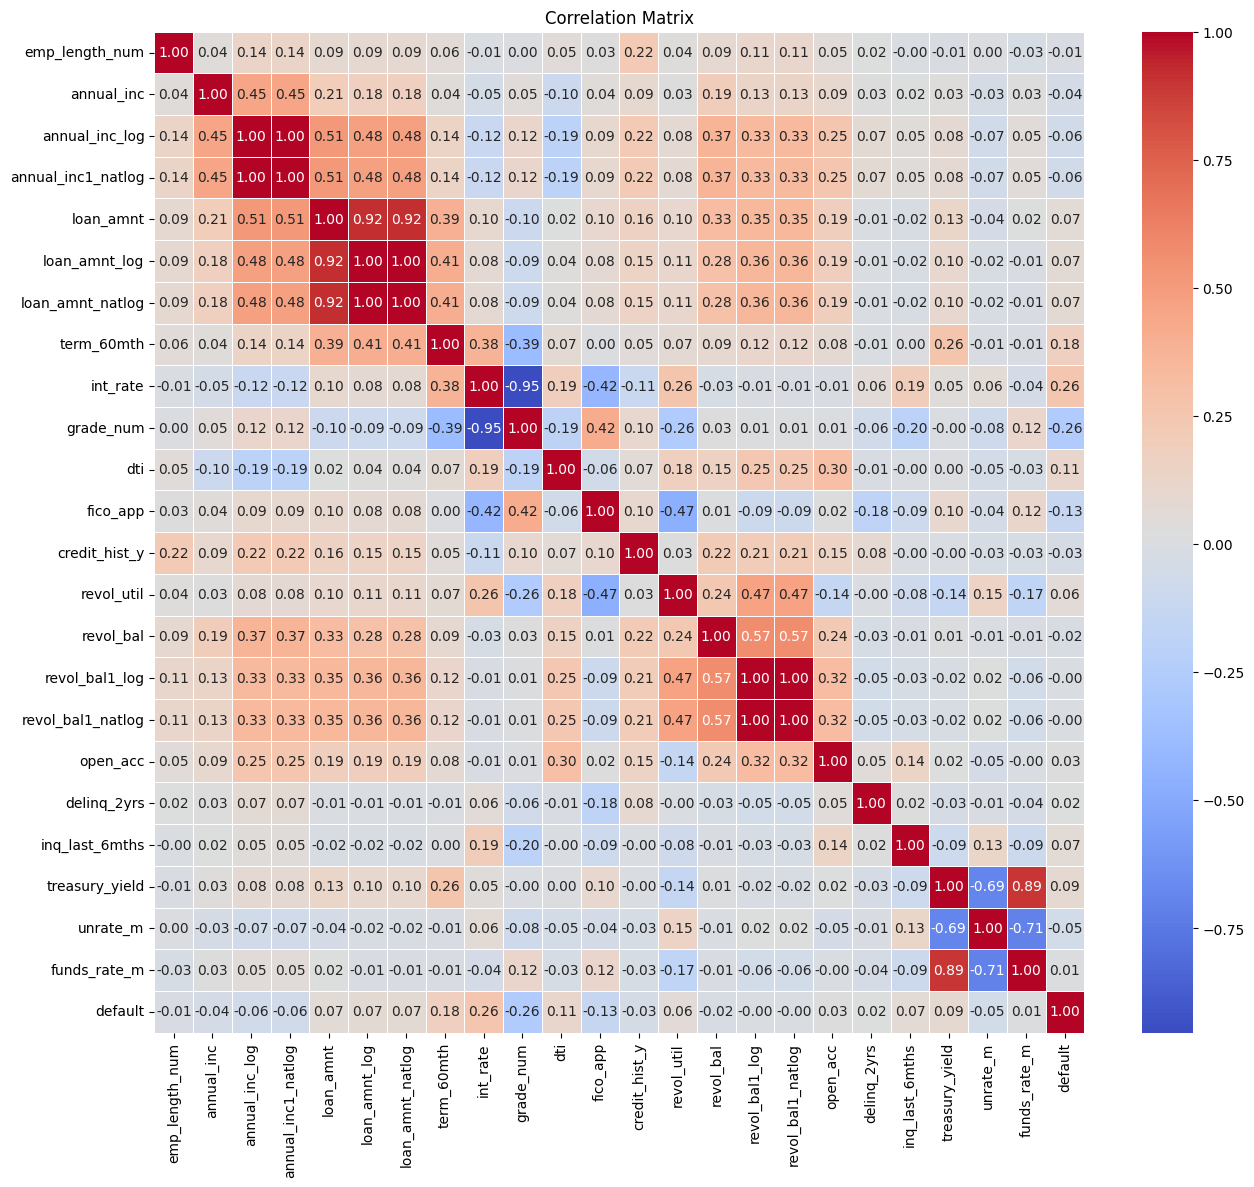

In [222]:
plt.figure(figsize=(15,13))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# <font color=blue>3. Entrepreneurs ('purpose' == 'small business')</font>

In [224]:
print(df_ac['purpose'].unique())
print(df_ac.individual.value_counts())
(df_ac[df_ac['purpose'] == 'small_business']).individual.value_counts()

['debt_consolidation' 'small_business' 'major_purchase' 'credit_card'
 'other' 'home_improvement' 'house' 'vacation' 'car' 'medical' 'moving'
 'renewable_energy' 'wedding' 'educational']
1    2113806
0      23403
Name: individual, dtype: int64


0    23403
Name: individual, dtype: int64

In [256]:
print(df_ac[compare_vars].dtypes)

emp_length_num      Int64
annual_inc        float64
loan_amnt         float64
term_60mth        float64
int_rate          float64
grade_num           int64
dti               float64
revol_util        float64
revol_bal         float64
delinq_2yrs       float64
inq_last_6mths    float64
fico_app          float64
default           float64
dtype: object


In [264]:
# DataFrame copy
df_ac = df_ac.copy()

# (object → float)
compare_vars = ['emp_length_num', 'annual_inc', 'loan_amnt', 'term_60mth', 'int_rate',
                'grade_num', 'dti', 'revol_util', 'revol_bal', 'delinq_2yrs',
                'inq_last_6mths', 'fico_app', 'default']
df_ac[compare_vars] = df_ac[compare_vars].apply(pd.to_numeric, errors='coerce')
t_test_results = {} # dictionary

# t-test & mean, std, count
for var in compare_vars:
    group1 = df_ac[df_ac['purpose'] == 'small_business'][var].dropna().astype(float)
    group2 = df_ac[df_ac['purpose'] != 'small_business'][var].dropna().astype(float)
    
    # mean, std, count
    mean_group1, std_group1, count_group1 = group1.mean(), group1.std(), group1.count()
    mean_group2, std_group2, count_group2 = group2.mean(), group2.std(), group2.count()
    
    # check the possibility of t-test (enough sample?)
    if len(group1) > 1 and len(group2) > 1:
        t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  
    else:
        t_stat, p_value = None, None  # not enough data: None
    
    # result save
    t_test_results[var] = {
        'Mean_SB': mean_group1,
        'Std_SB': std_group1,
        'Mean_Other': mean_group2,
        'Std_Other': std_group2,
        't-stat': t_stat,
        'p-value': p_value,
        'N_SB': count_group1,  # Small Business
        'N_Other': count_group2  # Other
    }
t_test_df = pd.DataFrame.from_dict(t_test_results, orient='index')
# column order
column_order = ['Mean_SB', 'Std_SB', 'Mean_Other', 'Std_Other', 't-stat', 'p-value', 'N_SB', 'N_Other']
t_test_df = t_test_df[column_order]

In [266]:
t_test_df
# t_test_df.to_csv("t_test_results.csv", index=True)  # CSV FILE SAVE

,Mean_SB,Std_SB,Mean_Other,Std_Other,t-stat,p-value,N_SB,N_Other
emp_length_num,5.47122,3.66292,5.97968,3.69857,-20.83487,0.00000,22792,1984094
annual_inc,94858.34851,82429.63038,78835.36558,115421.57233,29.41931,0.00000,23403,2113806
loan_amnt,16270.62770,10159.95594,14779.33957,9021.93749,22.35723,0.00000,23403,2113806
term_60mth,0.25236,0.43438,0.28090,0.44944,-9.99033,0.00000,23403,2113806
int_rate,15.32726,5.39698,13.03289,4.78479,64.75387,0.00000,23403,2113806
grade_num,4.70487,1.47425,5.34615,1.25366,-66.27976,0.00000,23403,2113806
dti,14.58689,8.50759,18.13709,8.41643,-63.49535,0.00000,23403,2113805
revol_util,43.10642,26.22893,50.59483,24.58815,-43.44208,0.00000,23378,2112319
revol_bal,14515.06931,28017.72266,16669.25137,22820.43686,-11.71915,0.00000,23403,2113806
delinq_2yrs,0.34085,0.94340,0.30972,0.87164,5.02520,0.00000,23403,2113806


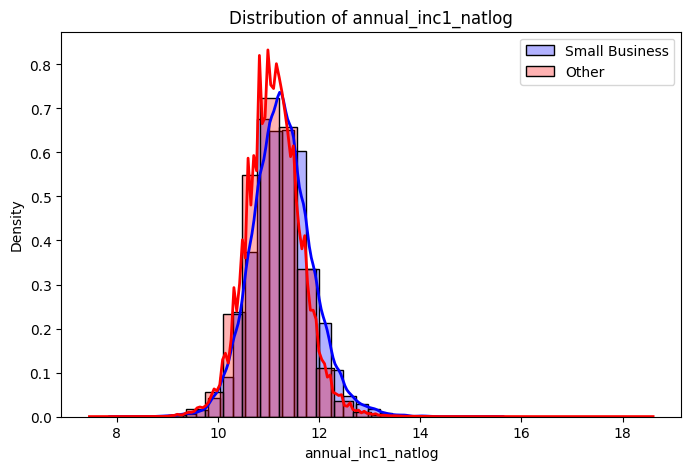

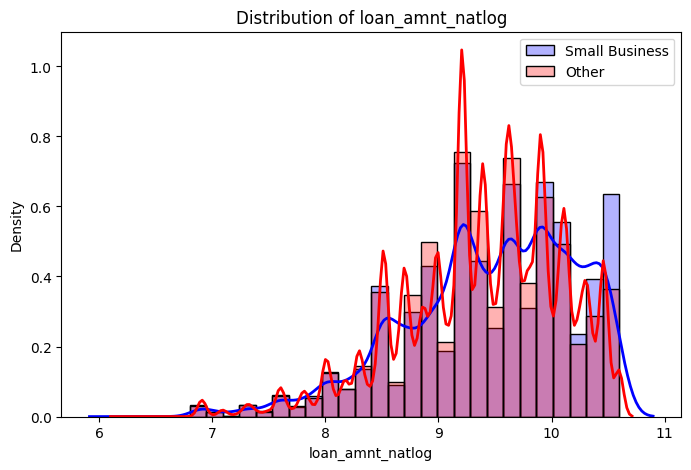

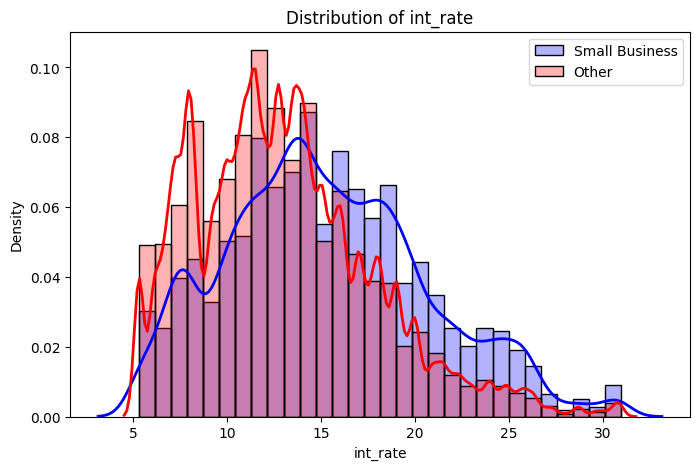

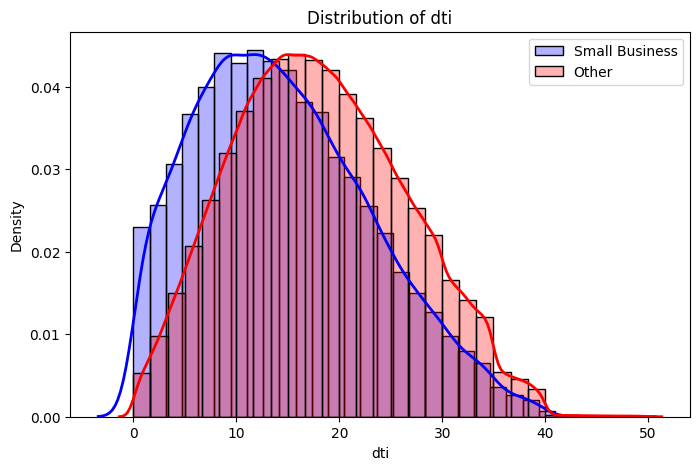

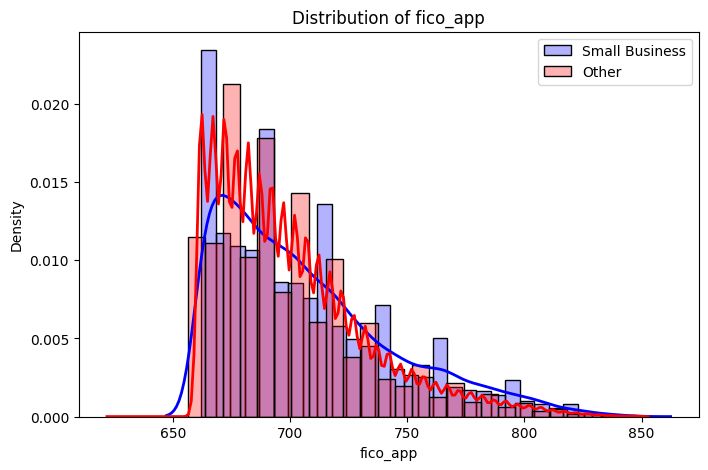

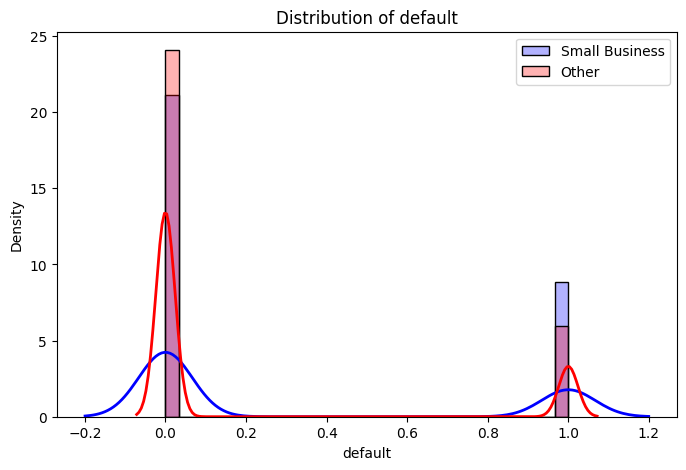

In [284]:
compare_vars_graph = ['annual_inc1_natlog', 'loan_amnt_natlog', 'int_rate', 'dti','fico_app', 'default']
# Density Plot
for var in compare_vars_graph:
    plt.figure(figsize=(8, 5))

    sns.histplot(df_ac[df_ac['purpose'] == 'small_business'][var], bins=30, kde=False, 
                 color='blue', label='Small Business', alpha=0.3, stat='density', edgecolor='black')
    sns.histplot(df_ac[df_ac['purpose'] != 'small_business'][var], bins=30, kde=False, 
                 color='red', label='Other', alpha=0.3, stat='density', edgecolor='black')
    # KDE line
    sns.kdeplot(df_ac[df_ac['purpose'] == 'small_business'][var], color='blue', linewidth=2)
    sns.kdeplot(df_ac[df_ac['purpose'] != 'small_business'][var], color='red', linewidth=2)

    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')  # y-axis: Density
    plt.legend()
    plt.show()

# <font color=blue>4. Decision (ongoing)</font>
- 'funded_amnt_inv' < $100 because of unrealistic value

In [ ]:
(ongoing)
controls_list = ['fico_app', 'term_60mth', 'emp_length_num'] # 'bc_util'
winsor_vars_list = ['annual_inc1_natlog', 'loan_amnt_natlog', 'dti', 'credit_hist_y', 
                    'revol_util', 'revol_bal1_natlog', 'delinq_2yrs', 'inq_last_6mths'] # 'bc_util'

dummies_list_num = [] # controls or fixed_effects (dummy) - non_string
dummies_list_str = ['home_ownership', 'purpose', 'addr_state', 'yearm_issue']

# <font color=blue>Appendix</font>

## Appendix A. All available columns

In [18]:
# Preprocessed data
df_ac.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 194 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          2260668 non-null  object 
 1    loan_amnt                                   2260668 non-null  float64
 2    funded_amnt                                 2260668 non-null  float64
 3    funded_amnt_inv                             2260435 non-null  float64
 4    term                                        2260668 non-null  object 
 5    int_rate                                    2260668 non-null  float64
 6    installment                                 2260668 non-null  float64
 7    grade                                       2260668 non-null  object 
 8    sub_grade                                   2260668 non-null  object 
 9    emp_title                                   